# Assignment: Ensemble Learning, Recommender Systems, Clustering and PCA

## Exercise 1: Adaboost

Consider the training file provided adaboost-training.csv. It consists of three columns: a tweet id, a tweet text and a label (one of four labels). Your goal is to build a multi-class classifier that can predict the label of a given tweet.

First, perform some pre-processing of the data by stemming, removing stop-words, etc and use tf-idf for term representation.


### Import Libraries

In [11]:
import nltk
import sklearn
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Load Data

In [12]:
# loading data
df = pd.read_csv('/content/adaboost-training.csv', header=None)
df.head(10)

,0,1,2
0,'1',Yesterday was supposed to be 70 and sunny/cold...,caution and advice
1,'2',@Juss2Live: News was goin crazy about tornado...,caution and advice
2,'3',@spann: Everybody on the campus of the Univer...,caution and advice
3,'4',Almyra Arkansas tornado about to hit the ground,caution and advice
4,'5',I hear the tornado sires going off now. Build...,caution and advice
5,'6',Tornado watch canceled for Douglas County Cole...,caution and advice
6,'7',In the U.S. they have tornado watch.. In Saint...,caution and advice
7,'8',At mssu for memorial service. #Joplin #superwindy,caution and advice
8,'9',Thank god possible tornado moved away from thi...,caution and advice
9,'10',Tornado headed toward us.... we're closing dow...,caution and advice


### Split Data

Split your data into 80% training and 20% validation.

In [13]:
# features
x = df[1]
#labels
y = df[2]

# splitting data into training and validation set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

### Process Data

 Process your data by removing stop words, perform stemming and represent the data using tf-idf.

In [14]:
def preprocess(X):
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    X_preprocessed = []
    for sentence in X:
        preprocessed_sentence = ''
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            if not word in stop_words:
                preprocessed_sentence += ps.stem(word) + ' '

        X_preprocessed.append(preprocessed_sentence)

    return X_preprocessed

# preprocessing train and validation text data
x_train = preprocess(x_train)
x_val = preprocess(x_val)

# tfidf vectorizer
tfidf = TfidfVectorizer()
# fitting vectorizer using x_train data and transforming x_train
x_train_tfidf = tfidf.fit_transform(x_train)
# transforming x_val
x_val_tfidf = tfidf.transform(x_val)
# creating the label encoder
encoder = LabelEncoder()
# encoding y_train labels
y_train = encoder.fit_transform(y_train)
# encoding y_val labels
y_val = encoder.transform(y_val)

### Train Adaboost

Train an Adaboost classifier with logistic regression as a base one. U
se the validation set to optimize the hyperparameters of the model using GridSearch.
<br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html"> Adaboost classifier</a>, you should pass <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> Logistic Regression</a> as base_estimator parameter

In [17]:
# choose parameters needed for adaboost grid search i.e. learning_rate and n_estimators parameters
parameters = {'learning_rate':[0.01, 0.1, 1.0],'n_estimators':[50,100,200]}

# create adaboost model with base_estimator as LogisticRegression
base_estimator = LogisticRegression(solver='liblinear')
ada_boost_classifier = AdaBoostClassifier(base_estimator=base_estimator)
# create the gridsearch
grid_search = GridSearchCV(ada_boost_classifier, parameters, scoring='accuracy', cv=5)
# fit gridsearch
grid_search.fit(x_train_tfidf, y_train)
# report the best parameter
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
# report the best score
best_score = grid_search.best_score_
print("Best Score:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Best Score: 0.5548485903237034


Report the validation accuracy and F-measure of your selected model.


In [21]:
# create the best adaboost model with the best reported parameters
best_adaboost= grid_search.best_estimator_

# fit the best model
best_adaboost.fit(x_train_tfidf, y_train)

# report the best model accuracy and f-measure
y_pred = best_adaboost.predict(x_val_tfidf)

accuracy = accuracy_score(y_val, y_pred)

f1_measure = f1_score(y_val, y_pred, average='weighted')

print("The Best Model Accuracy is:", accuracy)
print("The Best Model F-Measure is:", f1_measure)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


The Best Model Accuracy is: 0.6084905660377359
The Best Model F-Measure is: 0.5306129688894557


## Exercise 2: Recommender System

In [2]:
# Replace the file path with the correct one if needed
!unzip '/content/ml-100k (1).zip'


Archive:  /content/ml-100k (1).zip
   creating: ml-100k/
  inflating: __MACOSX/._ml-100k      
  inflating: ml-100k/u.item          
  inflating: __MACOSX/ml-100k/._u.item  
  inflating: ml-100k/u3.test         
  inflating: __MACOSX/ml-100k/._u3.test  
  inflating: ml-100k/u1.base         
  inflating: __MACOSX/ml-100k/._u1.base  
  inflating: ml-100k/u.info          
  inflating: __MACOSX/ml-100k/._u.info  
  inflating: ml-100k/u2.test         
  inflating: __MACOSX/ml-100k/._u2.test  
  inflating: ml-100k/u5.test         
  inflating: __MACOSX/ml-100k/._u5.test  
  inflating: ml-100k/u.genre         
  inflating: __MACOSX/ml-100k/._u.genre  
  inflating: ml-100k/ub.test         
  inflating: __MACOSX/ml-100k/._ub.test  
  inflating: ml-100k/ua.base         
  inflating: __MACOSX/ml-100k/._ua.base  
  inflating: ml-100k/u.data          
  inflating: __MACOSX/ml-100k/._u.data  
  inflating: ml-100k/README          
  inflating: __MACOSX/ml-100k/._README  
  inflating: ml-100k/u4.test 

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Reading users file
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')
# Reading data file
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')
# Reading items file
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')
# merging data as one dataframe
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

movie_idx = {}
idx_movie = {}
for i in movies.values:
    movie_idx[i[1]] = i[0]
    idx_movie[i[0]] = i[1]

In this exercise, we provide you with an implementation of a collaborative-filtering recommender system. Your task is to train the recommender system on the MovieLens dataset with 100k ratings: https://grouplens.org/datasets/movielens/100k/. When you unzip the zip assignment file, the dataset will be in the same directory of your assignment.

Once done training, 1) identify your top-3 favorite movies from the dataset and for each movie, retrieve its top-3 closest movies, and 2) pick three random users from the dataset and get the top-5 recommended movies to them by the the recommender system. Note that the maxtrix factorization module in the code below is just trying to factorize the rating matrix into submatrices, one which is for the user weights and the other which is for the movies' features (as discussed in class).

In [4]:
lens

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,748,"Saint, The (1997)",14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Saint%2C%20Th...,729,4,893286638,19,M,student,56567
99996,751,Tomorrow Never Dies (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,729,3,893286338,19,M,student,56567
99997,879,"Peacemaker, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Peacemaker%2C...,729,3,893286299,19,M,student,56567
99998,894,Home Alone 3 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,729,1,893286511,19,M,student,56567


In [6]:
# unique users ids data
user_map = pd.Series(
    index=np.unique(lens['user_id']),
    data=np.arange(lens['user_id'].nunique()),
    name='user_map')

# unique movies ids data
movie_map = pd.Series(
    index=np.unique(lens['movie_id']),
    data=np.arange(lens['movie_id'].nunique()),
    name='movie_map')
# mapping unique users ids to the lens data
user_inds = lens['user_id'].map(user_map)
# mapping unique movies ids to the lens data
movie_inds = lens['movie_id'].map(movie_map)

# creating a pivot table of user_id, movie_id, and rating
rating_matrix = (
        pd.pivot_table(
            data=lens,
            values='rating',
            index=user_inds,
            columns=movie_inds,
        ).fillna(0).values
)
rating_matrix
rating_matrix = rating_matrix.astype(np.float32)



In [7]:
# MatrixFactorization class
class MatrixFactorization():
    # constructor
    def __init__(self, rating_matrix, rating_matrix_val, k=5, lmbda=0.01, max_epochs=50, lr=0.1):
        '''
        rating_matrix: the matrix of rating (row: user, col: movie)
        k : int, default=2
            Number of latent features
        lmbda : float, default=0.01
            Regularization parameter
        max_epochs : int, default=15
            Max number of iterations to run
        lr: float, default:0.1
            Learning rate
        '''
        self.rating_matrix = rating_matrix
        self.rating_matrix_val = rating_matrix_val
        self.k = k
        self.lmbda = lmbda
        self.max_epochs = max_epochs
        self.lr = lr
        self.U = np.random.normal(scale=1./self.k, size=(rating_matrix.shape[0], self.k))
        self.V = np.random.normal(scale=1./self.k, size=(self.k, rating_matrix.shape[1]))
        self.b_u = np.zeros(rating_matrix.shape[0])
        self.b_i = np.zeros(rating_matrix.shape[1])
        self.b = np.mean(rating_matrix[np.where(rating_matrix != 0)])
        self.mean_squared_errors = []
        self.mean_squared_errors_val = []
    # fitting the model
    def fit(self):
        for it in range(self.max_epochs):
            for i in range(len(self.rating_matrix)):
                for j in range(len(self.rating_matrix[i])):
                    if self.rating_matrix[i][j] > 0:
                        eij = self.rating_matrix[i][j] - (self.predict_rating_user_movie(i, j))
                        self.b_u[i] += self.lr * (eij - self.lmbda * self.b_u[i])
                        self.b_i[j] += self.lr * (eij - self.lmbda * self.b_i[j])
                        self.U[i,:] += self.lr * (eij * self.V[:,j] - self.lmbda * self.U[i,:])
                        self.V[:,j] += self.lr * (eij * self.U[i,:] - self.lmbda * self.V[:,j])

            self.mean_squared_errors.append(self.mse_training(self.rating_matrix, self.predict()))
            self.mean_squared_errors_val.append(self.mse_validation(self.rating_matrix, self.rating_matrix_val, self.predict()))

    # reporting model's mse using the training set
    def mse_training(self, true_rating, pred_rating):
        '''
        pred_matrix: the predict matrix of rating (row: user, col: movie)
        return: mean squared error
        '''
        error = 0
        for rt, rp in zip(true_rating, pred_rating):
            for vt, vp in zip(rt, rp):
                if vt > 0:
                    error += pow(vt - vp, 2)
        return np.sqrt(error)

    # reporting model's mse using testing set
    def mse_validation(self, true_rating, test_rating, pred_rating):
        '''
        pred_matrix: the predict matrix of rating (row: user, col: movie)
        return: mean squared error
        '''
        error = 0
        for rt, rtt, rp in zip(true_rating, test_rating, pred_rating):
            for vt, vtt, vp in zip(rt, rtt, rp):
                if vt == -1:
                    error += pow(vtt - vp, 2)
        return np.sqrt(error)

    # predicting the user's movie rating
    def predict_rating_user_movie(self, i, j):
        '''
        i: user row
        j: movie col
        '''
        return self.b + self.b_u[i] + self.b_i[j] + np.dot(self.U[i,:],self.V[:,j])

    # rating prediction
    def predict(self):
        '''
        return: rating prediction
        '''
        return self.b + self.b_u[:,np.newaxis] + self.b_i[np.newaxis:, ] + np.dot(self.U, self.V)

    # plotting model's loss
    def plot_loss(self):
        iters = [i for i in range(self.max_epochs)]
        plt.xlabel("Iterations")
        plt.ylabel("Mean Squared Error")
        plt.plot(iters, self.mean_squared_errors)
        plt.plot(iters, self.mean_squared_errors_val)

    # mean square error result
    def mse_result(self):
        return self.mean_squared_errors[-1]



In [8]:
# splitting data into train and validation sets
def create_training_validation_set(rating_matrix):
    r_test = rating_matrix.copy()
    r_train = rating_matrix.copy()

    for r in range(0,r_train.shape[0]):
        for c in range(0, r_train.shape[1]):
            if np.random.rand()<0.2 and r_train[r,c] != 0:
                r_train[r,c] = -1

    return np.asarray(r_train), r_test

rating_matrix_training, rating_matrix_test = create_training_validation_set(rating_matrix)

In [9]:
# finding top movies
def find_top_close_movies(movie_idx, idx_movie, pred_rating, movie_name):
    movie_to_check = pred_rating[:, movie_idx[movie_name]] # 'Star Wars (1977)'
    df1 = pd.DataFrame(pred_rating)
    df2 = pd.DataFrame(movie_to_check)
    df = df1.corrwith(df2[0], axis=0)
    results = df.sort_values(ascending=False).head(4)[1:]
    for i, j in zip(list(results.index), results.values):
        print(idx_movie[i], j)

In [10]:
# recommending movies
def recommend_movies_to_user(idx_movie, pred_rating, user_id):
    user_to_check = pred_rating[user_id, :]
    df1 = pd.DataFrame(pred_rating)
    df2 = pd.DataFrame(user_to_check)
    df = df1.corrwith(df2[0], axis=1)
    results = df.sort_values(ascending=False).head(6)[1:]

    movie_index = []
    for i in results.index:
        movie_index.append(pred_rating[i,:])

    movie_index = np.asarray(movie_index)

    movie_index = np.mean(movie_index, axis=0)

    results = pd.DataFrame(movie_index).sort_values(by=0, ascending=False).head(5)

    for i, j in zip(list(results.index), results.values):

        if user_to_check[i]:
            try:
                print(idx_movie[i])
            except Exception as e:
                pass

## Tune the hyperparameters

You have to implement your own GridSerch method to tune the model  hyperparameters: k (number of latent features and weights), lmbda (regularization), max_epochs, lr (learning rate). You should then report  the training and the validation mean squared errors and plot the loss of your best model. Code snippets for doing each task are given below.  

In [11]:
# grid search function
def grid_search(parameters):
    min_mse = 1000
    best_parameters=[]
    # loop over all parameters
    for k in range( len( parameters ) ) :
        # model with the kth parameter
        model = MatrixFactorization(rating_matrix_training, rating_matrix_test,  parameters[k][0], parameters[k][1], max_epochs=parameters[k][2], lr=parameters[k][3])
        # fit model
        model.fit()
        # predict labels
        pred = model.predict()
        # measure mse
        curr_mse=model.mse_validation(rating_matrix_training, rating_matrix_test, pred)
        # find the best parameters with the minimum mse
        if min_mse > curr_mse :
            min_mse = curr_mse
            best_parameters=[parameters[k][0],parameters[k][1],parameters[k][2],parameters[k][3]]

    print( "Minimum mse achieved by our model through grid searching : ", min_mse )
    return best_parameters


In [12]:
import itertools
# input your parameters
k= []
lmbda= []
max_epochs=[]
lr=[]
# merge all parameters in one list
parameters=[k,lmbda,max_epochs,lr]
parameters= list(itertools.product(*parameters))

# gridsearch
best_parameters=grid_search(parameters)

Minimum mse achieved by our model through grid searching :  1000


In [14]:
# report best parameters
best_parameters

[]

In [17]:
# pass the best parameters to MatrixFactorization model
best_model = MatrixFactorization(rating_matrix_training, rating_matrix_test,  k=5, lmbda=0.01, max_epochs=10, lr=0.01)
# fit model
best_model.fit()
# predict labels
pred = best_model.predict()
# report best model mse score
best_model.mse_validation(rating_matrix_training, rating_matrix_test, pred)

135.1578619364854

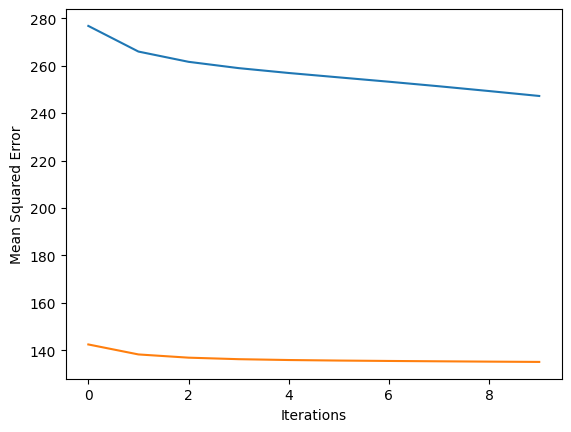

In [18]:
# plot the model loss
best_model.plot_loss()

In [19]:
# report the best model mse_results
best_model.mse_result()

247.2174051393278

## Choose a Movie

In [20]:
find_top_close_movies(movie_idx, idx_movie, pred, 'Star Wars (1977)')

Fantasia (1940) 0.9992224950884698
The Courtyard (1995) 0.9985276813417324
Keys to Tulsa (1997) 0.9976087256448886


## Choose randomly a user id

In [21]:
recommend_movies_to_user(idx_movie, pred, 32)

Monty Python and the Holy Grail (1974)
Horseman on the Roof, The (Hussard sur le toit, Le) (1995)
Spy Hard (1996)
Seven (Se7en) (1995)
Santa Clause, The (1994)


## Exercise 3: Clustering

In this assignment you will run k-means clustering and PCA on a dataset of reviews of points of interests (POIs) on TripAdvisor. The dataset tripadvisor_review.csv consists of traveler's reviews on POIs in East Asia from 10 different categories (beaches, monuments, churches, venues, etc.). Each traveler rating is mapped into a 5-point scale as follows: Excellent(4), Very Good(3), Average(2), Poor(1), and Terrible(0).

Run k-means clustering on the TripAdvisor dataset provided using the Euclidean distance as a distance metric. Vary the number of clusters K from 2 to 10. Plot the clustering cost (i.e., inertia) against the number of clusters K. Report the value of K you could deduce from  your plot (if any). Make sure you do multiple runs of the algorithm with different initializations to ensure that you don’t get stuck in a local optimum.

In [24]:
from sklearn.cluster import KMeans
import matplotlib
# loading data
ta_data = pd.read_csv('/content/tripadvisor_review.csv')
# features
X = ta_data.drop('User ID', axis=1)
X.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

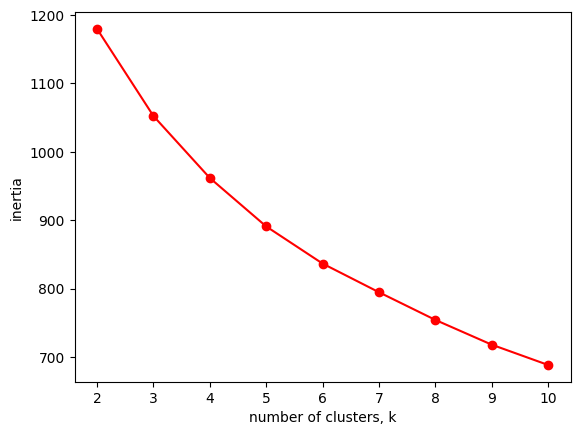

In [26]:
ks = range(2, 11)
inertias = []
for k in ks:
    # create a KMeans instance with k clusters: model
    model =KMeans(n_clusters=k, random_state=42)
    # fit model to X
    model.fit(X)
    # append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='red')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Exercise 4: PCA

Run Principal Component Analysis (PCA) on the TripAdvisor dataset and project the data into the first two principal components. Plot the dataset by projecting it on these two components and color the travlers based on their best cluster labels from exercise 1.

In [27]:
from sklearn.decomposition import PCA
import matplotlib
import seaborn as sns

# create a PCA instance: pca
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
# save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
PCA_components.rename(columns = {0:'Component1', 1:'Component2'}, inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

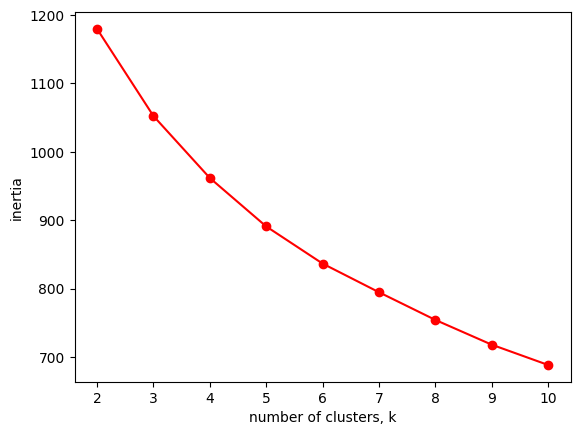

In [28]:
ks = range(2, 11)
inertias = []
for k in ks:
    # create a KMeans instance with k clusters: model
    model =KMeans(n_clusters=k, random_state=42)

    # fit model to samples
    model.fit(X)

    # append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='red')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [30]:
!pip install seaborn --upgrade


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


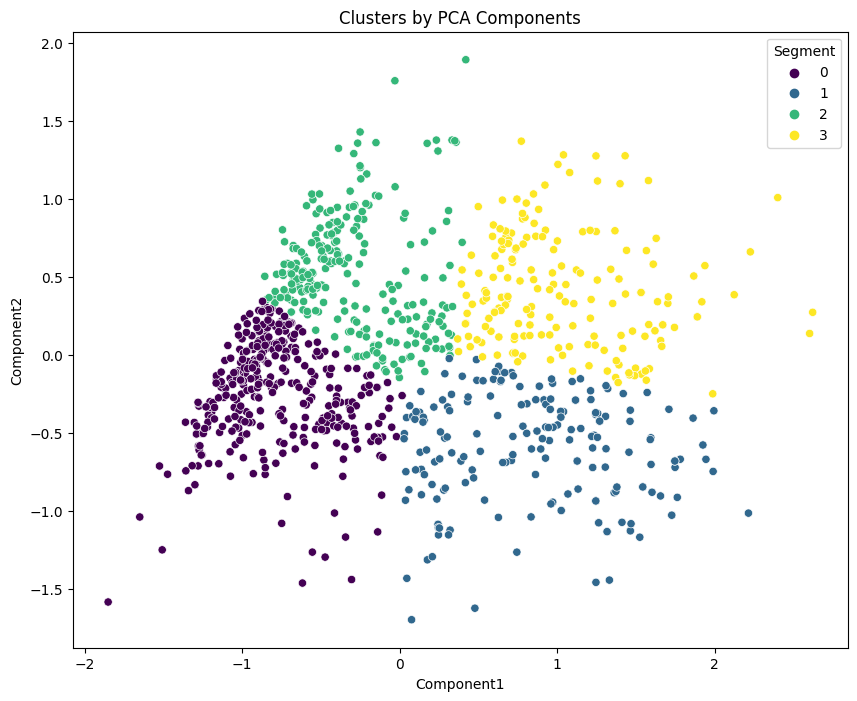

In [32]:
# pass the best number of clusters (n_clusters) as you see fit from the previous plot
kmeans_pca=KMeans(n_clusters=4)
kmeans_pca.fit(PCA_components)
# concatenate data with the PCA components
df_pca_kmeans=pd.concat([X,PCA_components], axis=1)
# best cluster labels
df_pca_kmeans['Segment']=kmeans_pca.labels_
# plots Axes
x_axis=df_pca_kmeans['Component1']
y_axis=df_pca_kmeans['Component2']
# cluster plotting
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_pca_kmeans, x='Component1', y='Component2', hue='Segment', palette='viridis')
plt.title('Clusters by PCA Components')
plt.show()